In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(true_labels, predicted_labels):
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = 2 * tp / (2 * tp + fp + fn) if (tp + fn) > 0 else 0
    percent_errors_identified = (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Percentage of Errors Correctly Identified: {percent_errors_identified:.2f}%")
    return accuracy, f1, percent_errors_identified


# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv") 

# Preprocess data
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Method 1: One-Class Neural Network (Autoencoder)
def one_class_nn_method(features_scaled, target):
    input_dim = features_scaled.shape[1]
    inputs = Input(shape=(input_dim,))
    encoded = Dense(300, activation='relu')(inputs)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train autoencoder in an unsupervised way
    autoencoder.fit(features_scaled, features_scaled, epochs=50, batch_size=256, shuffle=True)
    
    # Compute reconstruction error
    reconstruction = autoencoder.predict(features_scaled)
    mse = np.mean(np.power(features_scaled - reconstruction, 2), axis=1)

    # Set threshold for anomalies (95th percentile of reconstruction error)
    threshold = np.percentile(mse, 93)
    y_pred = (mse > threshold).astype(int)

    print("\nOne-Class NN Evaluation:")
    return evaluate_model(target, y_pred)


# Method 2: Variational Autoencoder (VAE) - Simplified
def vae_method(features_scaled, target):
    input_dim = features_scaled.shape[1]
    inputs = Input(shape=(input_dim,))
    encoded = Dense(300, activation='relu')(inputs)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    
    vae = Model(inputs, decoded)
    vae.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train VAE in an unsupervised way
    vae.fit(features_scaled, features_scaled, epochs=50, batch_size=256, shuffle=True)
    
    # Compute reconstruction error
    reconstruction = vae.predict(features_scaled)
    mse = np.mean(np.power(features_scaled - reconstruction, 2), axis=1)

    # Set threshold for anomalies (95th percentile)
    threshold = np.percentile(mse, 95)
    y_pred = (mse > threshold).astype(int)

    print("\nVAE Evaluation:")
    return evaluate_model(target, y_pred)


# Method 3: One-Class SVM
def one_class_svm_method(features_scaled, target, nu=0.05):
    svm = OneClassSVM(nu=nu, kernel="rbf")
    svm.fit(features_scaled)

    # Predict anomalies (-1 means outlier)
    preds = svm.predict(features_scaled)
    y_pred = (preds == -1).astype(int)

    print("\nOne-Class SVM Evaluation:")
    return evaluate_model(target, y_pred)


# Run each method
one_class_nn_method(features_scaled, target)
vae_method(features_scaled, target)
one_class_svm_method(features_scaled, target)


Epoch 1/50

42/42 [==============================] - 1s 5ms/step - loss: 0.9932
Epoch 2/50

42/42 [==============================] - 0s 4ms/step - loss: 0.7498
Epoch 3/50

42/42 [==============================] - 0s 4ms/step - loss: 0.6881
Epoch 4/50

42/42 [==============================] - 0s 4ms/step - loss: 0.6706
Epoch 5/50

42/42 [==============================] - 0s 4ms/step - loss: 0.6621
Epoch 6/50

42/42 [==============================] - 0s 4ms/step - loss: 0.6568
Epoch 7/50

42/42 [==============================] - 0s 4ms/step - loss: 0.6532
Epoch 8/50

42/42 [==============================] - 0s 5ms/step - loss: 0.6503
Epoch 9/50

42/42 [==============================] - 0s 5ms/step - loss: 0.6482
Epoch 10/50

42/42 [==============================] - 0s 5ms/step - loss: 0.6467
Epoch 11/50

42/42 [==============================] - 0s 5ms/step - loss: 0.6455
Epoch 12/50

42/42 [==============================] - 0s 5ms/step - loss: 0.6447
Epoch 13/50

42/42 [=================

(0.9032440588457186, 0.0984182776801406, 9.271523178807946)


2/2 [==============================] - 0s 2ms/step
Epoch 0: D Loss=0.6213, G Loss=0.6696

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 1ms/step

2/2 [====================

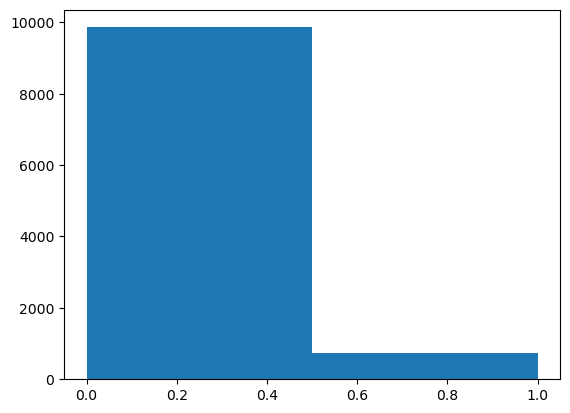

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")

# Preprocess data
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col].values  # Keep labels for evaluation

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

input_dim = features_scaled.shape[1]  # Set dynamically


# Generator Network
def build_generator(input_dim, output_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(128)(inputs)
    x = LeakyReLU(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(264)(x)
    x = LeakyReLU(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(output_dim, activation='tanh')(x)
    return Model(inputs, x)


# Discriminator Network
def build_discriminator(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(264)(inputs)
    x = LeakyReLU(0.2)(x)
    x = Dense(128)(x)
    x = LeakyReLU(0.2)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, x)
    model.compile(optimizer=Adam(0.002), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Compile GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during GAN training
    inputs = Input(shape=(generator.input_shape[1],))
    generated_data = generator(inputs)
    outputs = discriminator(generated_data)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.002), loss='binary_crossentropy')
    return model


# Train GAN
def train_gan(generator, discriminator, gan, data, epochs=500, batch_size=64):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train discriminator
        discriminator.trainable = True  # Unfreeze for training
        real_data = data[np.random.randint(0, data.shape[0], half_batch)]
        noise = np.random.randn(half_batch, generator.input_shape[1])
        fake_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        discriminator.trainable = False  # Freeze again before GAN training
        noise = np.random.randn(batch_size, generator.input_shape[1])
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            d_loss_value = float(np.mean(d_loss))  # Ensure it's a scalar
            g_loss_value = float(np.mean(g_loss))  # Ensure it's a scalar
            print(f"Epoch {epoch}: D Loss={d_loss_value:.4f}, G Loss={g_loss_value:.4f}")


# Anomaly detection using GAN reconstruction error
def detect_anomalies(generator, features_scaled):
    noise = np.random.randn(len(features_scaled), generator.input_shape[1])
    reconstructed = generator.predict(noise)
    mse = np.mean(np.power(features_scaled - reconstructed, 2), axis=1)

    # Set threshold at 95th percentile
    threshold = np.percentile(mse, 93)
    anomaly_labels = (mse > threshold).astype(int)
    
    return anomaly_labels


# Build & train GAN
generator = build_generator(input_dim, input_dim)  # Input and output dimensions match
discriminator = build_discriminator(input_dim)
gan = build_gan(generator, discriminator)

train_gan(generator, discriminator, gan, features_scaled, epochs=2000, batch_size=128)

# Detect anomalies
detected_anomalies = detect_anomalies(generator, features_scaled)

# Evaluate model (labels only used here)
conf_matrix = confusion_matrix(target, detected_anomalies)
print("Confusion Matrix:\n", conf_matrix)
plt.hist(detected_anomalies, bins=2)
plt.show()


Epoch 1/200

40/40 [==============================] - 1s 4ms/step - loss: 0.2278
Epoch 2/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0901
Epoch 3/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 4/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0192
Epoch 5/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 6/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 7/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 8/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 9/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 10/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 11/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 12/200

40/40 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 13/200

40/40 [====

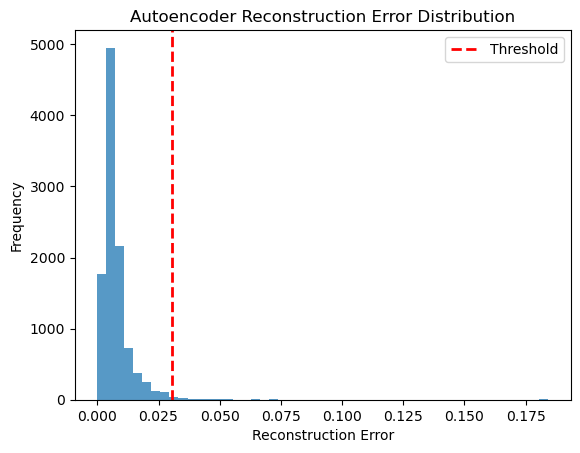

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Feature Scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Dimensionality Reduction with PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
features_pca = pca.fit_transform(features_scaled)

# Train Autoencoder on Normal Data (target = 0)
normal_data = features_pca[target == 0]
input_dim = normal_data.shape[1]

inputs = Input(shape=(input_dim,))
encoded = Dense(264, activation='relu')(inputs)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(normal_data, normal_data, epochs=200, batch_size=256, shuffle=True)

# Compute Reconstruction Error
reconstructed = autoencoder.predict(features_pca)
mse = np.mean(np.power(features_pca - reconstructed, 2), axis=1)

# Dynamic Threshold using IQR
q1, q3 = np.percentile(mse, [10, 90])
iqr = q3 - q1
threshold = q3 + 1.5 * iqr
y_pred_autoencoder = (mse > threshold).astype(int)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
y_pred_iso = iso_forest.fit_predict(features_pca)
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)  # Convert -1 (anomaly) to 1

# One-Class SVM
oc_svm = OneClassSVM(nu=0.1)
y_pred_svm = oc_svm.fit_predict(features_pca)
y_pred_svm = np.where(y_pred_svm == 1, 0, 1)

# Evaluate Models
def evaluate_model(true_labels, predicted_labels, model_name):
    cm = confusion_matrix(true_labels, predicted_labels)
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    pr_auc = auc(recall, precision)
    percent_errors_identified = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100
    print(f"\n{model_name} Results:")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision-Recall AUC: {pr_auc:.4f}")
    print(f"Percentage of Errors Identified: {percent_errors_identified:.2f}%")
    return pr_auc, percent_errors_identified

# Run Evaluations
evaluate_model(target, y_pred_autoencoder, "Autoencoder")
evaluate_model(target, y_pred_iso, "Isolation Forest")
evaluate_model(target, y_pred_svm, "One-Class SVM")

# Plot Reconstruction Error Distribution
plt.hist(mse, bins=50, alpha=0.75)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
plt.legend()
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Autoencoder Reconstruction Error Distribution")
plt.show()


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load your dataset (replace with actual features and target loading)
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")

# Preprocess data
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])
target = df[target_col]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to PyTorch tensors
tensor_data = torch.tensor(features_scaled, dtype=torch.float32)
target_tensor = torch.tensor(target.values, dtype=torch.float32)

# DataLoader for batching
data_loader = DataLoader(TensorDataset(tensor_data, target_tensor), batch_size=64, shuffle=True)

# Define Transformer Model
class TransformerAnomalyDetector(nn.Module):
    def __init__(self, input_dim, num_heads=4, num_layers=2, hidden_dim=64):
        super(TransformerAnomalyDetector, self).__init__()

        # Use Linear Layer to adjust input dimension to be divisible by num_heads
        adjusted_input_dim = (input_dim // num_heads + 1) * num_heads
        self.input_adjuster = nn.Linear(input_dim, adjusted_input_dim)

        self.encoder_layer = nn.TransformerEncoderLayer(d_model=adjusted_input_dim, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(adjusted_input_dim, 1)
    
    def forward(self, x):
        x = self.input_adjuster(x)  # Adjust input dimension
        x = self.transformer(x.unsqueeze(1))  # Add batch dimension and pass through transformer
        x = self.fc(x[:, -1, :])  # Take last time step's output
        return x.squeeze()

# Initialize model
input_dim = features_scaled.shape[1]
model = TransformerAnomalyDetector(input_dim)

# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, data_loader, epochs=100):
    model.train()
    for epoch in range(epochs):
        for batch in data_loader:
            inputs, labels = batch
            optimizer.zero_grad()
            outputs = model(inputs)  # No need for unsqueeze here
            loss = criterion(outputs, inputs.mean(dim=1))  # Compare output to mean of input as a simple anomaly score
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Train the transformer model
train_model(model, data_loader)

# Generate anomaly scores
model.eval()
with torch.no_grad():
    anomaly_scores = model(tensor_data).numpy()

# Set threshold dynamically (e.g., top 5% anomalies)
threshold = np.percentile(anomaly_scores, 95)
predictions = (anomaly_scores > threshold).astype(int)

# Evaluate performance
tn, fp, fn, tp = confusion_matrix(target, predictions).ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
print(f"Precision: {tp / (tp + fp):.2f}, Recall: {tp / (tp + fn):.2f}")


Epoch 1, Loss: 0.0100
Epoch 2, Loss: 0.0039
Epoch 3, Loss: 0.0042
Epoch 4, Loss: 0.0034
Epoch 5, Loss: 0.0031
Epoch 6, Loss: 0.0029
Epoch 7, Loss: 0.1215
Epoch 8, Loss: 0.0059
Epoch 9, Loss: 0.0067
Epoch 10, Loss: 0.0440
Epoch 11, Loss: 0.0023
Epoch 12, Loss: 0.0031
Epoch 13, Loss: 0.0027
Epoch 14, Loss: 0.0019
Epoch 15, Loss: 0.0027
Epoch 16, Loss: 0.0026
Epoch 17, Loss: 0.0021
Epoch 18, Loss: 0.0048
Epoch 19, Loss: 0.0023
Epoch 20, Loss: 0.0027
Epoch 21, Loss: 0.0063
Epoch 22, Loss: 0.0060
Epoch 23, Loss: 0.0022
Epoch 24, Loss: 0.0090
Epoch 25, Loss: 0.0007
Epoch 26, Loss: 0.0018
Epoch 27, Loss: 0.0028
Epoch 28, Loss: 0.0026
Epoch 29, Loss: 0.0025
Epoch 30, Loss: 0.0046
Epoch 31, Loss: 0.0018
Epoch 32, Loss: 0.0031
Epoch 33, Loss: 0.0024
Epoch 34, Loss: 0.0084
Epoch 35, Loss: 0.0019
Epoch 36, Loss: 0.0072
Epoch 37, Loss: 0.0009
Epoch 38, Loss: 0.0023
Epoch 39, Loss: 0.0031
Epoch 40, Loss: 0.0025
Epoch 41, Loss: 0.0024
Epoch 42, Loss: 0.0036
Epoch 43, Loss: 0.0015
Epoch 44, Loss: 0.00

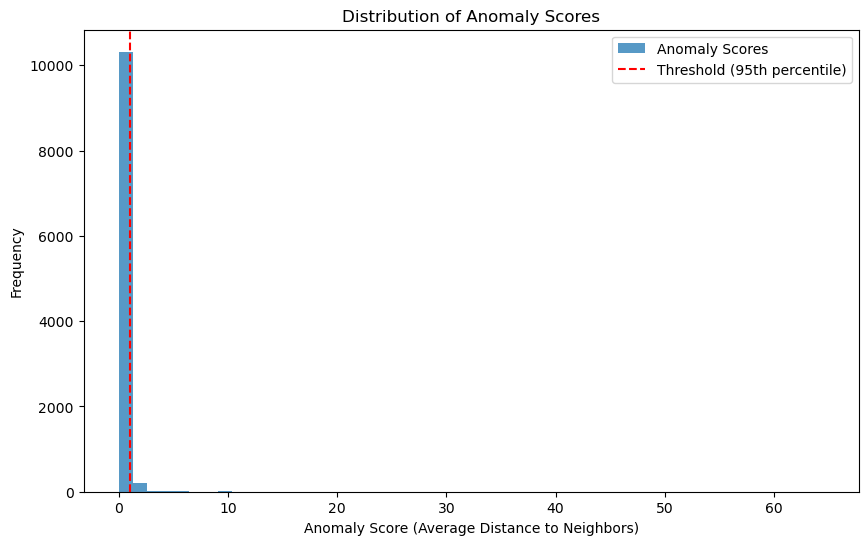

Precision: 0.0301
Recall: 0.0265
F1-Score: 0.0282


In [38]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")  # Replace with your correct path

# Preprocess data
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit KNN (unsupervised) to the data
knn = NearestNeighbors(n_neighbors=5)  # You can change the number of neighbors
knn.fit(features_scaled)

# Compute the distance to the nearest neighbors for each point
distances, indices = knn.kneighbors(features_scaled)

# Calculate the average distance to the nearest neighbors (anomaly score)
anomaly_scores = distances.mean(axis=1)

# Define an anomaly threshold (e.g., 95th percentile of distances)
threshold = np.percentile(anomaly_scores, 95)  # Anomaly threshold (top 5% most distant points)
predictions = (anomaly_scores > threshold).astype(int)  # 1 for anomaly, 0 for normal

# Evaluate performance with a plot
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, label='Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold (95th percentile)")
plt.xlabel('Anomaly Score (Average Distance to Neighbors)')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()

# Calculate precision, recall, and F1-score if labels are available
if target_col in df.columns:
    df['Predictions'] = predictions
    df['Actual'] = df[target_col]
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(df['Actual'], df['Predictions'])
    recall = recall_score(df['Actual'], df['Predictions'])
    f1 = f1_score(df['Actual'], df['Predictions'])
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
else:
    print("No target column available for comparison.")


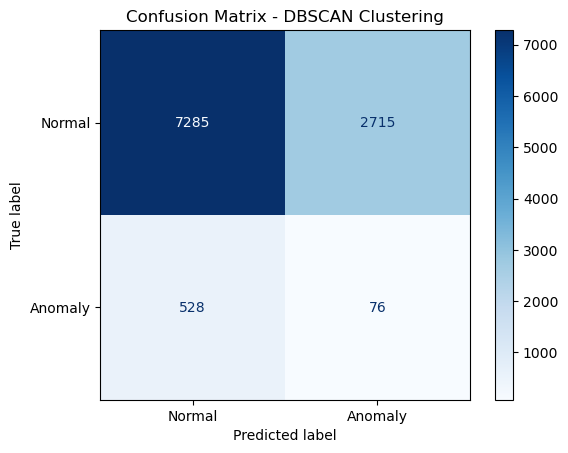

Confusion Matrix:
[[7285 2715]
 [ 528   76]]


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")  # Replace with your correct path

# Preprocess data
df.replace({"TRUE": 1, "FALSE": 0, True: 1, False: 0}, inplace=True)
ignore_cols = ["id", "index"]
target_col = "Error"
features = df.drop(columns=ignore_cols + [target_col])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering (use eps and min_samples as hyperparameters)
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(features_scaled)

# True labels from the dataset (Error: 1 for anomalies, 0 for normal)
true_labels = df[target_col].values

# Convert DBSCAN labels: -1 are outliers/noise, so treat them as anomalies for comparison
predicted_labels = (db_labels == -1).astype(int)  # Convert -1 (noise) to 1 (anomaly)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap="Blues")

# Show confusion matrix plot
plt.title("Confusion Matrix - DBSCAN Clustering")
plt.show()

# Print confusion matrix
print(f"Confusion Matrix:\n{cm}")


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")

# Preprocessing
features = df.drop(columns=["id", "index", "Error"])  # Remove ID, index, and target columns
features_scaled = StandardScaler().fit_transform(features)

# Train Random Cut Forest (via Isolation Forest)
model = IsolationForest(contamination=0.2)
model.fit(features_scaled)

# Predict anomalies
predictions = model.predict(features_scaled)
predicted_labels = (predictions == -1).astype(int)

# Evaluate results if you have true labels
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df["Error"], predicted_labels)
print(f"Confusion Matrix:\n{cm}")


Confusion Matrix:
[[8139 1861]
 [ 344  260]]


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")

# Preprocessing: Drop the non-feature columns and scale the features
features = df.drop(columns=["id", "index", "Error"])  # Remove ID, index, and target columns
features_scaled = StandardScaler().fit_transform(features)

# 1. CBLOF (Cluster-Based Local Outlier Factor)
# Since CBLOF is a hybrid model, we can try a basic method using clustering and distance to centroids.
from sklearn.cluster import KMeans

def cblof(features, contamination=0.1):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters based on your data
    kmeans.fit(features)
    centroids = kmeans.cluster_centers_
    
    # Calculate distance from each point to the nearest centroid
    distances = np.min(np.linalg.norm(features - centroids[:, np.newaxis], axis=2), axis=0)
    
    # Determine the threshold based on contamination rate (top percentage of points with the largest distance)
    threshold = np.percentile(distances, 100 * (1 - contamination))
    
    # Mark as outliers those points that are further than the threshold
    predictions = (distances > threshold).astype(int)
    
    return predictions

cblof_predictions = cblof(features_scaled, contamination=0.1)

# 2. HBOS (Histogram-Based Outlier Score)
# HBOS can be approximated by checking if points fall in the extreme tails of the distribution.
def hbos(features, contamination=0.1):
    # Apply PCA for dimensionality reduction before applying histogram method
    pca = PCA(n_components=1)  # Reduce to 1D for simplicity (you can change the number of components)
    features_reduced = pca.fit_transform(features)
    
    # Calculate histogram and density
    hist, bins = np.histogram(features_reduced, bins=30, density=True)
    
    # Get the threshold based on the contamination rate
    threshold = np.percentile(features_reduced, 100 * (1 - contamination))
    
    # Mark outliers as those that fall outside the threshold
    predictions = (features_reduced < threshold).astype(int)
    
    return predictions

hbos_predictions = hbos(features_scaled, contamination=0.1)

# 3. Elliptic Envelope (Based on Gaussian distribution)
elliptic_model = EllipticEnvelope(contamination=0.1)
elliptic_model.fit(features_scaled)
elliptic_predictions = elliptic_model.predict(features_scaled)
elliptic_predicted_labels = (elliptic_predictions == -1).astype(int)

# Evaluate results using confusion matrix (only for evaluation)
print("Confusion Matrix for CBLOF:")
cm_cblof = confusion_matrix(df["Error"], cblof_predictions)
print(cm_cblof)

print("\nConfusion Matrix for HBOS:")
cm_hbos = confusion_matrix(df["Error"], hbos_predictions)
print(cm_hbos)

print("\nConfusion Matrix for Elliptic Envelope:")
cm_elliptic = confusion_matrix(df["Error"], elliptic_predicted_labels)
print(cm_elliptic)


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Confusion Matrix for CBLOF:
[[9122  878]
 [ 421  183]]

Confusion Matrix for HBOS:
[[1060 8940]
 [   1  603]]

Confusion Matrix for Elliptic Envelope:
[[9182  818]
 [ 361  243]]


In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from scipy.stats import zscore
from scipy.sparse import csr_matrix

# Assuming your data is in a pandas DataFrame called `data`
# Split features and labels
# Load dataset
df = pd.read_csv(r"C:/Users/twool/Downloads/Feature_Extraction/6414_Test/GTAA_Errors_with_metrics.csv")

# Preprocessing: Drop the non-feature columns and scale the features
features = df.drop(columns=["id", "index", "Error"])  # Remove ID, index, and target columns
features_scaled = StandardScaler().fit_transform(features)

# Z-score anomaly detection
def zscore_anomaly_detection(features, threshold=3):
    z_scores = np.abs(zscore(features))
    return (z_scores > threshold).astype(int)

# Minimum Spanning Tree (MST) anomaly detection
def mst_anomaly_detection(features, k=5):
    # Construct the graph and compute the minimum spanning tree
    graph = kneighbors_graph(features, n_neighbors=k, mode='distance')
    
    # Convert the graph to a scipy sparse matrix for networkx processing
    graph_sparse = csr_matrix(graph)
    
    # Compute the MST using the sparse matrix
    mst = nx.minimum_spanning_tree(nx.Graph(graph_sparse))
    
    # Calculate the weight (distance) of edges in the MST
    node_degrees = np.array([data['weight'] for _, _, data in mst.edges(data=True)])
    
    # Find threshold based on the k-nearest neighbors method
    threshold = np.percentile(node_degrees, 90)
    return (node_degrees > threshold).astype(int)

# Apply both anomaly detection methods
zscore_predictions = zscore_anomaly_detection(features_scaled, threshold=3)
mst_predictions = mst_anomaly_detection(features_scaled, k=5)

# Assuming `labels` contains the ground truth labels (0 or 1)
labels = df['Error'].values

# Confusion matrix for Z-score method
zscore_cm = confusion_matrix(labels, zscore_predictions)
zscore_report = classification_report(labels, zscore_predictions)

# Confusion matrix for MST method
mst_cm = confusion_matrix(labels, mst_predictions)
mst_report = classification_report(labels, mst_predictions)

# Print out confusion matrices and classification reports
print("Z-Score Anomaly Detection")
print("Confusion Matrix:")
print(zscore_cm)
print("\nClassification Report:")
print(zscore_report)

print("\nMinimum Spanning Tree Anomaly Detection")
print("Confusion Matrix:")
print(mst_cm)
print("\nClassification Report:")
print(mst_report)

    

<class 'ValueError'>: Classification metrics can't handle a mix of binary and multilabel-indicator targets